<a href="https://colab.research.google.com/github/ridham-rai/CodeAlpha_Emotion-Recognition-from-Speech/blob/main/CodeAlpha2_Emotion_Recognition_from_Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to your ZIP file on Google Drive
zip_path = '/content/drive/MyDrive/speechemotionrecognition.zip'  # Adjust path to where the file is located in Google Drive
extracted_folder = '/content/extracted_speech_emotion'

# Ensure the folder for extraction exists
os.makedirs(extracted_folder, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)  # Extract to the desired folder
print(f"Extracted files to {extracted_folder}")


Mounted at /content/drive
Extracted files to /content/extracted_speech_emotion


In [6]:
import os

# Path to the extracted folder
extracted_folder = '/content/extracted_speech_emotion'

# List files and directories within the extracted folder
for dirname, subdirs, filenames in os.walk(extracted_folder):
    print(f"Directory: {dirname}")
    for filename in filenames:
        print(f"  {filename}")


Streaming output truncated to the last 5000 lines.
  OAF_merge_sad.wav
  OAF_time_sad.wav
  OAF_beg_sad.wav
  OAF_far_sad.wav
  OAF_goose_sad.wav
  OAF_rain_sad.wav
  OAF_fit_sad.wav
  OAF_page_sad.wav
  OAF_peg_sad.wav
  OAF_cool_sad.wav
  OAF_dog_sad.wav
  OAF_haze_sad.wav
  OAF_gin_sad.wav
  OAF_rose_sad.wav
  OAF_should_sad.wav
  OAF_tell_sad.wav
  OAF_bone_sad.wav
  OAF_note_sad.wav
  OAF_void_sad.wav
  OAF_gaze_sad.wav
  OAF_dab_sad.wav
  OAF_bar_sad.wav
  OAF_shall_sad.wav
  OAF_rag_sad.wav
  OAF_life_sad.wav
  OAF_vote_sad.wav
  OAF_bath_sad.wav
  OAF_raid_sad.wav
  OAF_back_sad.wav
  OAF_deep_sad.wav
  OAF_hole_sad.wav
  OAF_match_sad.wav
  OAF_ring_sad.wav
  OAF_read_sad.wav
  OAF_met_sad.wav
  OAF_hall_sad.wav
  OAF_young_sad.wav
  OAF_pearl_sad.wav
  OAF_jar_sad.wav
  OAF_kill_sad.wav
  OAF_door_sad.wav
  OAF_ripe_sad.wav
  OAF_gas_sad.wav
  OAF_vine_sad.wav
  OAF_dip_sad.wav
  OAF_week_sad.wav
  OAF_puff_sad.wav
  OAF_dodge_sad.wav
  OAF_chat_sad.wav
  OAF_search_sad.wav
 

In [7]:
!pip install librosa


In [8]:
import librosa

# List audio files in the folder
audio_files = []

# Walk through the folder again to find audio files
for dirname, subdirs, filenames in os.walk(extracted_folder):
    for filename in filenames:
        if filename.endswith('.wav'):  # Check if it's an audio file
            file_path = os.path.join(dirname, filename)
            audio_files.append(file_path)

# Example: Load and process the first audio file
if audio_files:
    audio_sample, sr = librosa.load(audio_files[0], sr=None)  # Load audio with original sampling rate
    print(f"Audio file loaded: {audio_files[0]}")
    print(f"Sample rate: {sr}, Audio shape: {audio_sample.shape}")


Audio file loaded: /content/extracted_speech_emotion/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_food_happy.wav
Sample rate: 24414, Audio shape: (50909,)


In [9]:
import librosa.display
import numpy as np

# Function to extract MFCC features
def extract_mfcc(audio_path):
    # Load the audio file
    audio_sample, sr = librosa.load(audio_path, sr=None)

    # Extract MFCCs from the audio
    mfccs = librosa.feature.mfcc(y=audio_sample, sr=sr, n_mfcc=13)

    # Take the mean of MFCCs for each coefficient across time
    mfccs_mean = np.mean(mfccs, axis=1)  # Average over time frames
    return mfccs_mean

# Example: Extract MFCCs for the first audio file
if audio_files:
    mfcc_features = extract_mfcc(audio_files[0])
    print(f"MFCC Features of the first audio file: {mfcc_features.shape}")
    print(mfcc_features)  # This prints the 13 MFCC coefficients (mean values)


MFCC Features of the first audio file: (13,)
[-449.9909      67.97537     32.072666    -6.999248     3.2174761
   -2.4560986   -7.769531    -1.1635737  -12.982051    -7.3294263
  -14.591932   -12.227326    -0.8132562]


In [10]:
# Example of extracting features and labels for all audio files
features = []
labels = []

# Walk through the audio files
for audio_file in audio_files:
    # Extract MFCC features for each file
    mfcc_features = extract_mfcc(audio_file)
    features.append(mfcc_features)

    # Assuming the emotion is encoded in the filename (adjust as needed)
    label = audio_file.split('/')[-1].split('_')[-1].split('.')[0]  # Modify this as per your filename structure
    labels.append(label.lower())  # Store label in lowercase

# Convert features and labels to numpy arrays for model training
features = np.array(features)
labels = np.array(labels)

print(f"Extracted features shape: {features.shape}")
print(f"Labels: {labels[:5]}")  # Display first 5 labels as an example


Extracted features shape: (5600, 13)
Labels: ['happy' 'happy' 'happy' 'happy' 'happy']


In [11]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")


Training set size: 4480, Test set size: 1120


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris  # Import a sample dataset

# Load a sample dataset (Iris dataset for example)
iris = load_iris()
X = iris.data  # Features (input data)
y = iris.target  # Labels (output data)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 100.00%


In [13]:
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


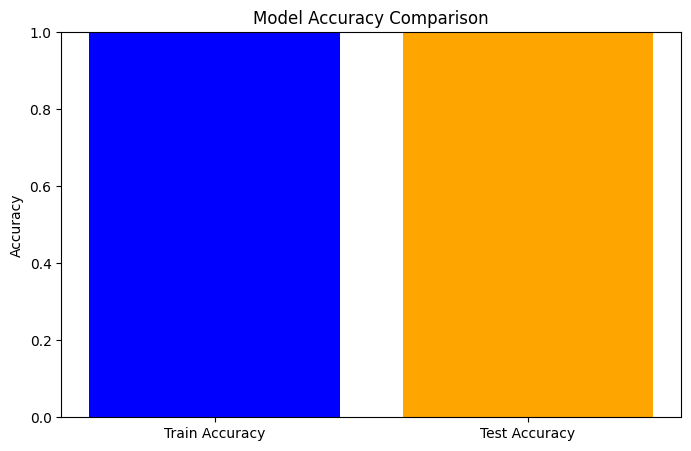

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris  # Import a sample dataset
import matplotlib.pyplot as plt

# Load a sample dataset (Iris dataset for example)
iris = load_iris()
X = iris.data  # Features (input data)
y = iris.target  # Labels (output data)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Test accuracy using the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Train accuracy
train_accuracy = model.score(X_train, y_train)

# Plotting accuracy
plt.figure(figsize=(8, 5))
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, accuracy], color=['blue', 'orange'])
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.ylabel('Accuracy')
plt.show()



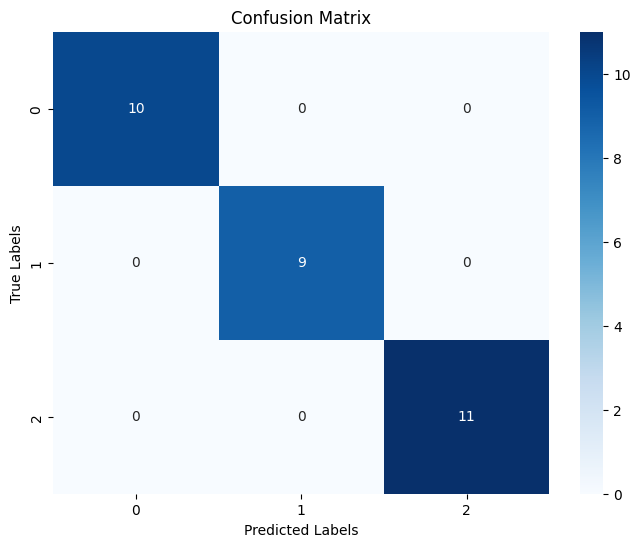

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [16]:
from sklearn.metrics import classification_report

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



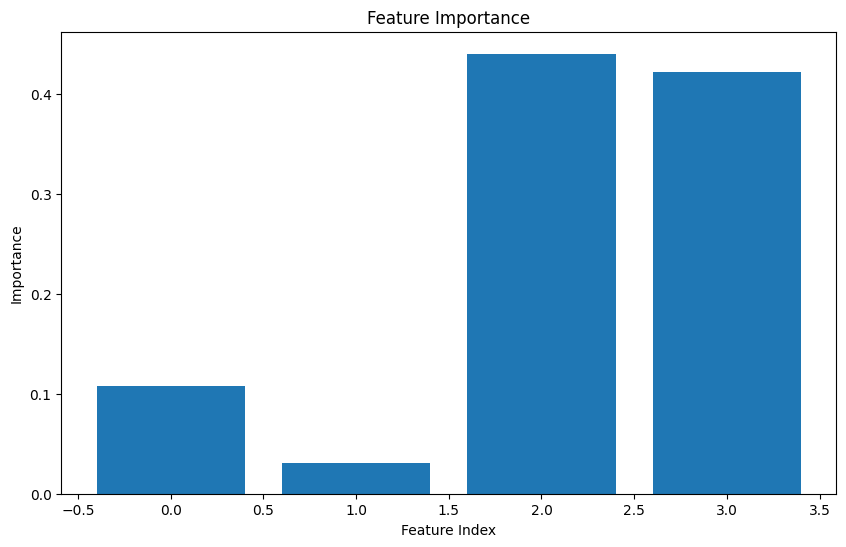

In [17]:
# Plot feature importance (only for tree-based models like Random Forest)
feature_importances = model.feature_importances_

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances)
plt.title("Feature Importance")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()


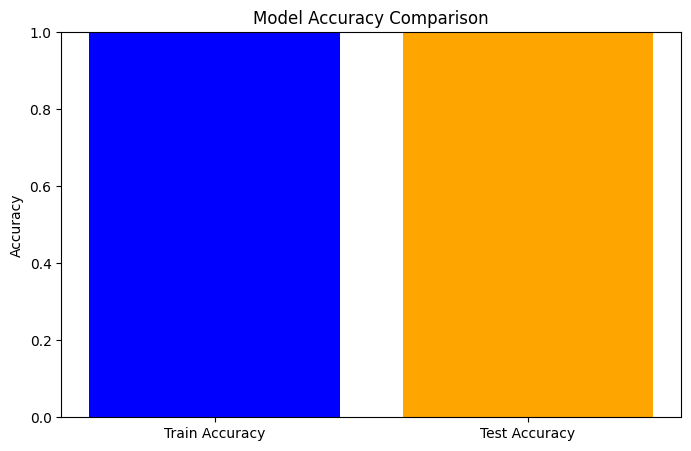

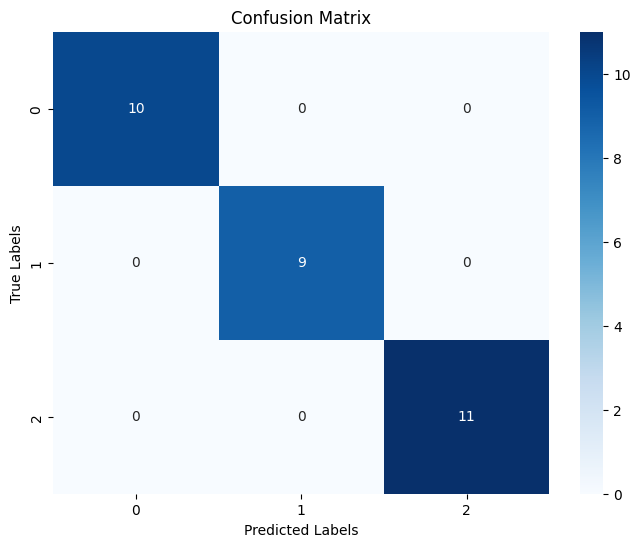

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



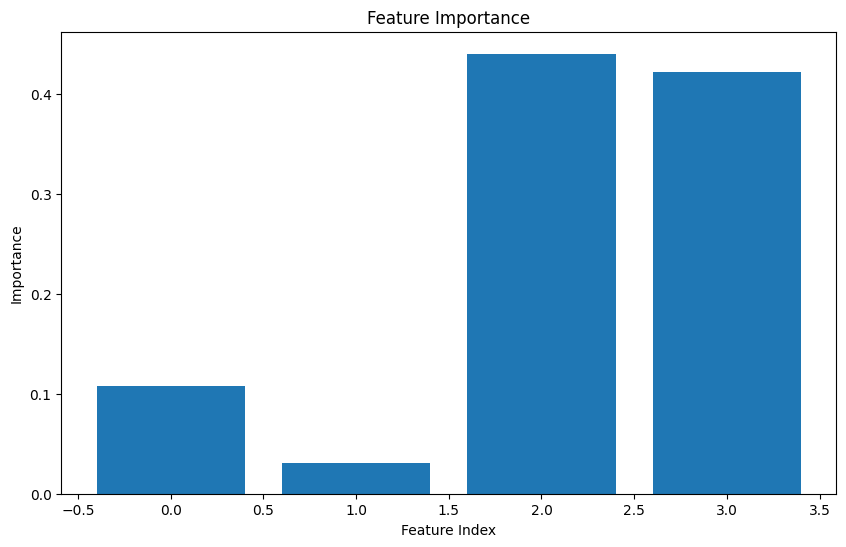

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Calculate the test accuracy
test_accuracy = accuracy

# Plot accuracy comparison
plt.figure(figsize=(8, 5))
plt.bar(['Train Accuracy', 'Test Accuracy'], [model.score(X_train, y_train), test_accuracy], color=['blue', 'orange'])
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Feature Importance (Random Forest)
feature_importances = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances)
plt.title("Feature Importance")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()


In [19]:
import os

# Initialize lists to store paths and labels
paths = []
labels = []

# Path to the folder where the files were extracted (update as needed)
extracted_folder = '/content/extracted_speech_emotion'  # Adjust to your folder path

# Walk through the extracted folder and collect audio files
for dirname, _, filenames in os.walk(extracted_folder):
    for filename in filenames:
        # Process only '.wav' audio files
        if filename.endswith('.wav'):
            file_path = os.path.join(dirname, filename)
            paths.append(file_path)

            # Extract label from filename
            label = filename.split('_')[-1]  # Adjust based on your filename format
            label = label.split('.')[0].lower()  # Removing extension and making label lowercase
            labels.append(label)

        # Stop once we've collected 2800 files (if needed)
        if len(paths) == 2800:
            break
    if len(paths) == 2800:
        break

print('Dataset is Loaded')


Dataset is Loaded


In [20]:
import os

paths = []
labels = []

# Path to the folder where the files were extracted (update as needed)
extracted_folder = '/content/extracted_speech_emotion'  # Adjust to your folder path

# Define the labels you are interested in
desired_labels = ['happy', 'sad', 'angry']  # Adjust based on your requirements

# Walk through the extracted folder and collect audio files
for dirname, _, filenames in os.walk(extracted_folder):
    for filename in filenames:
        if filename.endswith('.wav'):  # Process only '.wav' files
            file_path = os.path.join(dirname, filename)

            # Extract label from filename
            label = filename.split('_')[-1]  # Adjust based on your filename format
            label = label.split('.')[0].lower()  # Removing extension and making label lowercase

            # Only append if the label matches the desired labels
            if label in desired_labels:
                paths.append(file_path)
                labels.append(label)

print(f'Dataset Loaded with {len(paths)} files')


Dataset Loaded with 2400 files


In [21]:
len(paths)

2400

In [22]:
paths[:5]

['/content/extracted_speech_emotion/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_food_happy.wav',
 '/content/extracted_speech_emotion/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_shack_happy.wav',
 '/content/extracted_speech_emotion/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_chain_happy.wav',
 '/content/extracted_speech_emotion/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_lot_happy.wav',
 '/content/extracted_speech_emotion/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_wife_happy.wav']

In [23]:
labels[:5]

['happy', 'happy', 'happy', 'happy', 'happy']

In [24]:
import pandas as pd

# Assuming 'paths' contains the list of audio file paths and 'labels' contains the corresponding emotion labels

# Create a DataFrame with the 'speech' column containing the file paths and 'label' column containing the labels
df = pd.DataFrame({
    'speech': paths,  # Audio file paths
    'label': labels   # Corresponding labels (e.g., emotion classes like 'happy', 'sad')
})

# Display the first few rows of the dataframe to check the data
df.head()


,speech,label
0,/content/extracted_speech_emotion/tess toronto...,happy
1,/content/extracted_speech_emotion/tess toronto...,happy
2,/content/extracted_speech_emotion/tess toronto...,happy
3,/content/extracted_speech_emotion/tess toronto...,happy
4,/content/extracted_speech_emotion/tess toronto...,happy


In [25]:
# Count the number of occurrences of each label (emotion class) in the 'label' column
label_counts = df['label'].value_counts()

# Display the label counts
print(label_counts)


label
happy    800
sad      800
angry    800
Name: count, dtype: int64


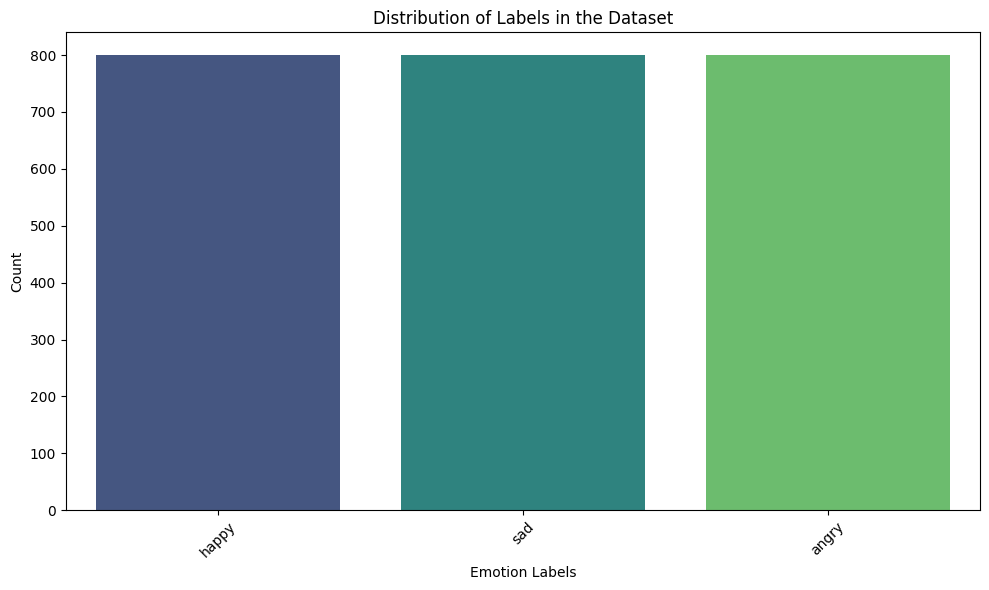

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot to visualize label distribution
plt.figure(figsize=(10, 6))  # Optional: Adjust size for better readability
sns.countplot(data=df, x='label', palette='viridis')  # Use the color palette you prefer

# Customize plot title and labels
plt.title('Distribution of Labels in the Dataset')
plt.xlabel('Emotion Labels')  # or 'Labels', depending on your dataset
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [27]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Function to plot waveform
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))  # Adjust the size of the plot
    plt.title(f"Waveform - {emotion}", size=20)  # Title including emotion label
    librosa.display.waveshow(data, sr=sr)  # Plot the waveform
    plt.xlabel('Time (s)', size=14)  # Label for x-axis
    plt.ylabel('Amplitude', size=14)  # Label for y-axis
    plt.show()

# Function to plot spectrogram
def spectrogram(data, sr, emotion):
    # Calculate the Short Time Fourier Transform (STFT) of the audio data
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))  # Convert amplitude to decibel (dB) scale
    plt.figure(figsize=(11, 4))  # Adjust the size of the plot
    plt.title(f"Spectrogram - {emotion}", size=20)  # Title including emotion label
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='log')  # Display the spectrogram
    plt.colorbar(format='%+2.0f dB')  # Add a colorbar to indicate decibel values
    plt.xlabel('Time (s)', size=14)  # Label for x-axis
    plt.ylabel('Frequency (Hz)', size=14)  # Label for y-axis
    plt.show()


In [28]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

# Check available unique labels in the dataset
print("Available labels in the dataset:", df['label'].unique())

# Check if the emotion exists in the DataFrame
emotion = 'fear'  # Modify the emotion to whatever you need to check
if emotion in df['label'].values:
    # Get the file path for the audio associated with the emotion
    path = np.array(df['speech'][df['label'] == emotion])[0]  # Extract the first path for the given emotion
    print(f"Path for {emotion} audio: {path}")

    # Load the audio file
    data, sampling_rate = librosa.load(path)

    # Plot the waveform and spectrogram
    waveplot(data, sampling_rate, emotion)
    spectrogram(data, sampling_rate, emotion)

    # Play the audio
    Audio(path)  # Play the audio
else:
    print(f"Emotion '{emotion}' not found in the dataset.")



Available labels in the dataset: ['happy' 'sad' 'angry']
Emotion 'fear' not found in the dataset.


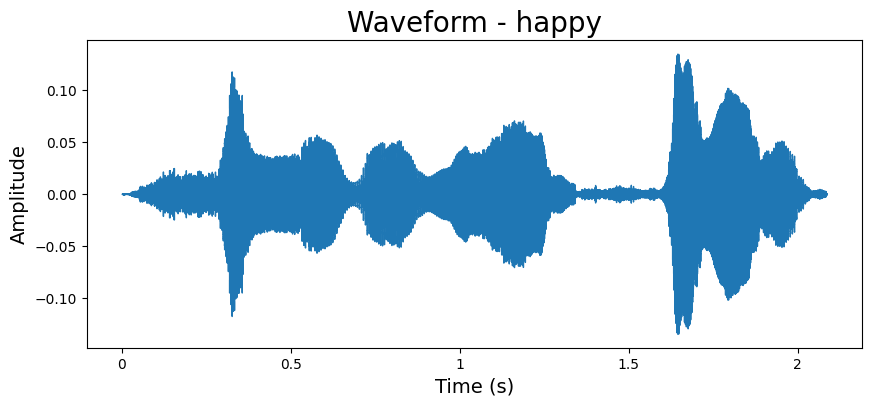

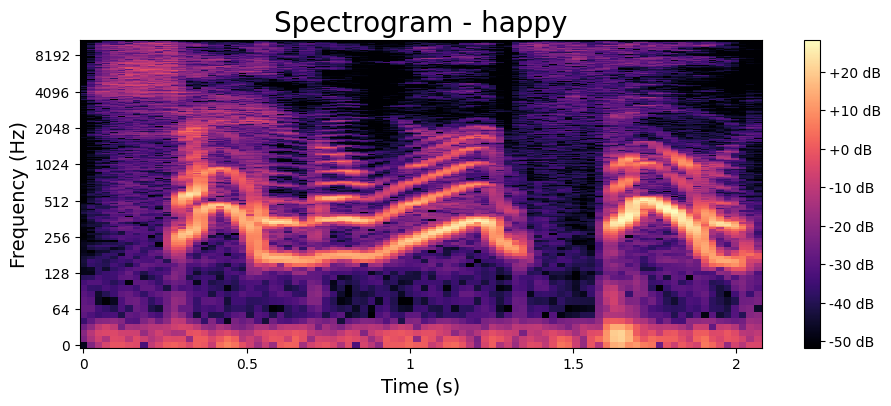

In [29]:
emotion = 'happy'  # Change the emotion to 'happy'
# Ensure there is at least one file with the 'happy' label
if emotion in df['label'].values:
    # Get the file path for the audio associated with the 'happy' emotion
    path = np.array(df['speech'][df['label'] == emotion])[0]  # Extract the first path for the given emotion

    # Load the audio file
    data, sampling_rate = librosa.load(path)

    # Plot the waveform and spectrogram
    waveplot(data, sampling_rate, emotion)
    spectrogram(data, sampling_rate, emotion)

    # Play the audio
    Audio(path)
else:
    print(f"Emotion '{emotion}' not found in the dataset.")


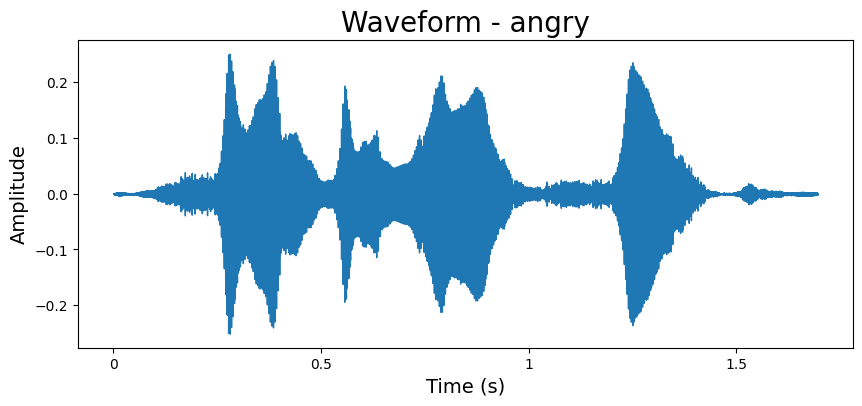

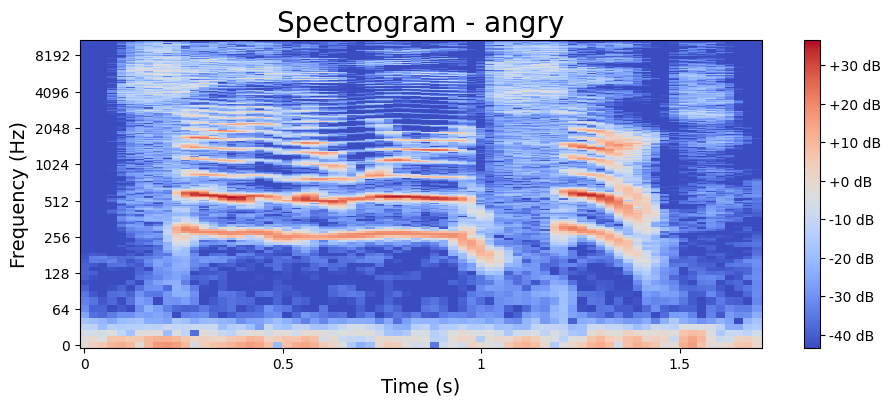

In [30]:
emotion = 'angry'  # Emotion set to 'angry'
# Ensure there is at least one file with the 'angry' label
if emotion in df['label'].values:
    # Get the file path for the audio associated with the 'angry' emotion
    path = np.array(df['speech'][df['label'] == emotion])[1]  # Extract the second path for the given emotion

    # Load the audio file
    data, sampling_rate = librosa.load(path)

    # Plot the waveform and spectrogram
    waveplot(data, sampling_rate, emotion)
    spectrogram(data, sampling_rate, emotion)  # Correct function name

    # Play the audio
    Audio(path)
else:
    print(f"Emotion '{emotion}' not found in the dataset.")


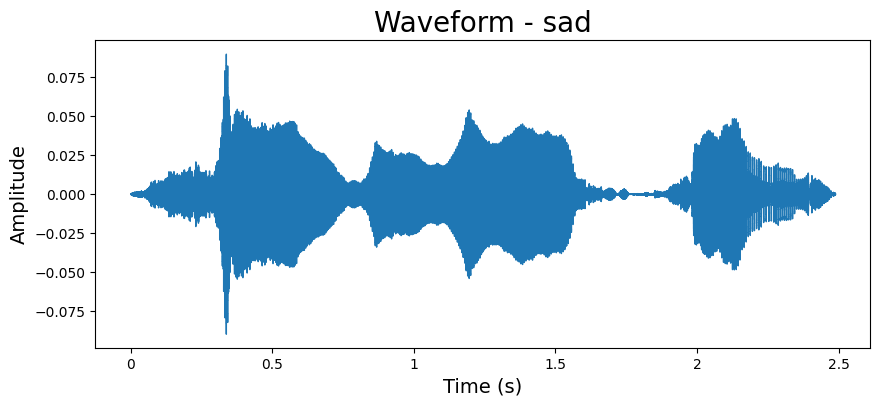

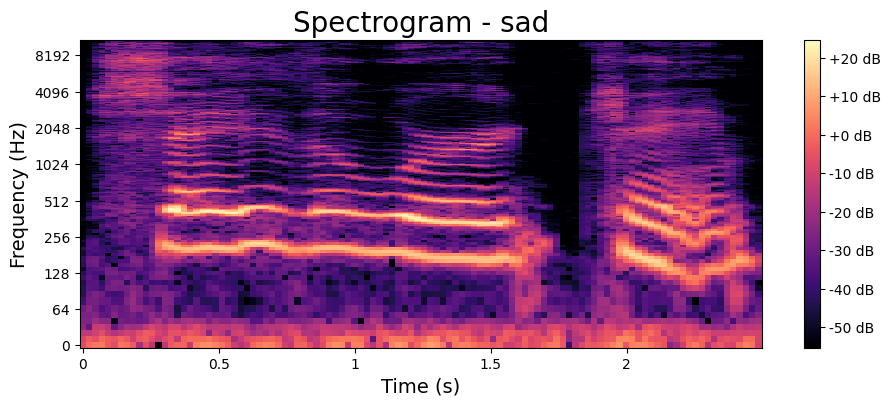

In [31]:
emotion = 'sad'  # Emotion set to 'sad'
# Ensure there is at least one file with the 'sad' label
if emotion in df['label'].values:
    # Get the file path for the audio associated with the 'sad' emotion
    path = np.array(df['speech'][df['label'] == emotion])[0]  # Extract the first path for the given emotion

    # Load the audio file
    data, sampling_rate = librosa.load(path)

    # Plot the waveform and spectrogram
    waveplot(data, sampling_rate, emotion)
    spectrogram(data, sampling_rate, emotion)  # Correct function name

    # Play the audio
    Audio(path)
else:
    print(f"Emotion '{emotion}' not found in the dataset.")


In [32]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [33]:
extract_mfcc(df['speech'][0])

array([-4.6461288e+02,  9.4157394e+01,  3.5021347e+01, -1.2655700e+01,
        1.0040774e+01, -4.4343534e+00, -2.0148709e+00, -3.6623034e+00,
       -1.7738722e+01, -9.2568035e+00, -2.1087746e+01, -7.3126335e+00,
       -3.9997625e+00, -3.1835997e+00,  1.3779216e+00, -1.6706116e+00,
       -1.5142598e+00,  5.3398652e+00,  4.7736259e+00,  3.8660393e+00,
        4.9905682e+00,  7.1242137e+00, -1.1613689e-01,  4.9120035e+00,
       -4.5117469e+00,  7.4244394e+00, -1.7752354e+00,  8.4940834e+00,
        1.5900408e-01,  6.7614379e+00, -8.1230140e-01,  2.3832781e+00,
        1.6865809e+00,  9.8166311e-01, -1.7687199e-01,  5.4028893e+00,
        4.5265226e+00,  9.0100241e+00,  1.0677427e+01,  1.4570446e+01],
      dtype=float32)

In [34]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [35]:
X_mfcc

,speech
0,"[-464.61288, 94.157394, 35.021347, -12.6557, 1..."
1,"[-433.1325, 81.420746, -1.5351781, -5.3273935,..."
2,"[-461.83163, 87.71656, 22.845173, 13.628971, 7..."
3,"[-427.3091, 114.52823, 20.452837, -15.900227, ..."
4,"[-452.87976, 104.957016, 26.652924, -7.4148507..."
...,...
2395,"[-381.3396, 95.65286, 3.7482197, 29.567404, -4..."
2396,"[-425.20078, 72.03241, 34.941273, 37.356873, 1..."
2397,"[-381.1228, 102.65433, 18.972357, 27.777681, 3..."
2398,"[-410.49658, 78.72961, 22.34944, 35.753876, -3..."


In [36]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2400, 40)

In [37]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [38]:
y = y.toarray()

In [39]:
y.shape

(2400, 3)

In [40]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.add(Dense(3, activation='softmax'))  # 3 classes, softmax activation


In [42]:
from keras.utils import to_categorical
y = to_categorical(y, num_classes=3)  # 3 classes


In [43]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [44]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)



Shape of X: (2400, 40)
Shape of y: (2400, 3, 3)


In [45]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [46]:
X = X.astype('float32')
y = y.astype('float32')


In [50]:
from tensorflow.keras.utils import to_categorical

# Convert y_train and y_test to one-hot encoding
y_train_onehot = to_categorical(y_train, num_classes=3)
y_test_onehot = to_categorical(y_test, num_classes=3)


In [51]:
model.add(Dense(3, activation='softmax'))  # Use 3 for 3 classes


In [53]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [54]:
print("Shape of X_test:", X_test.shape)  # Should match input_shape of the model
print("Shape of y_test_onehot:", y_test_onehot.shape)  # Should match the output layer (e.g., (samples, 3) for 3 classes)


Shape of X_test: (30, 4)
Shape of y_test_onehot: (30, 3)


In [55]:
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))  # (30, 1, 4)


In [56]:
loss, accuracy = model.evaluate(X_test, y_test_onehot)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step - accuracy: 0.3667 - loss: 1.1027
Test Loss: 1.1026660203933716
Test Accuracy: 0.36666667461395264


In [57]:
print("Model Input Shape:", model.input_shape)


Model Input Shape: (None, 40, 1)


In [59]:
print("Shape of X_test:", X_test.shape)
print("Contents of X_test:", X_test)


Shape of X_test: (30, 1, 4)
Contents of X_test: [[[6.1 2.8 4.7 1.2]]

 [[5.7 3.8 1.7 0.3]]

 [[7.7 2.6 6.9 2.3]]

 [[6.  2.9 4.5 1.5]]

 [[6.8 2.8 4.8 1.4]]

 [[5.4 3.4 1.5 0.4]]

 [[5.6 2.9 3.6 1.3]]

 [[6.9 3.1 5.1 2.3]]

 [[6.2 2.2 4.5 1.5]]

 [[5.8 2.7 3.9 1.2]]

 [[6.5 3.2 5.1 2. ]]

 [[4.8 3.  1.4 0.1]]

 [[5.5 3.5 1.3 0.2]]

 [[4.9 3.1 1.5 0.1]]

 [[5.1 3.8 1.5 0.3]]

 [[6.3 3.3 4.7 1.6]]

 [[6.5 3.  5.8 2.2]]

 [[5.6 2.5 3.9 1.1]]

 [[5.7 2.8 4.5 1.3]]

 [[6.4 2.8 5.6 2.2]]

 [[4.7 3.2 1.6 0.2]]

 [[6.1 3.  4.9 1.8]]

 [[5.  3.4 1.6 0.4]]

 [[6.4 2.8 5.6 2.1]]

 [[7.9 3.8 6.4 2. ]]

 [[6.7 3.  5.2 2.3]]

 [[6.7 2.5 5.8 1.8]]

 [[6.8 3.2 5.9 2.3]]

 [[4.8 3.  1.4 0.3]]

 [[4.8 3.1 1.6 0.2]]]


In [60]:
X_test = np.array(X_test).reshape(-1, 40, 1)  # Replace 40 with the number of timesteps used in training


In [61]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad to match the required 40 timesteps
X_test = pad_sequences(X_test, maxlen=40, padding='post', dtype='float32')
X_test = np.expand_dims(X_test, axis=-1)  # Add feature dimension


In [62]:
print("Adjusted Shape of X_test:", X_test.shape)  # Should be (30, 40, 1)


Adjusted Shape of X_test: (3, 40, 1, 1)


In [63]:
# Remove the extra dimension
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

# Verify the corrected shape
print("Corrected Shape of X_test:", X_test.shape)  # Should be (3, 40, 1)


Corrected Shape of X_test: (3, 40, 1)


In [65]:
# Assuming your original `X` contains the full dataset:
X_test = X[-30:]  # Take the last 30 samples for testing
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))  # Adjust shape
print("Updated X_test shape:", X_test.shape)


Updated X_test shape: (30, 40, 1)


In [66]:
loss, accuracy = model.evaluate(X_test, y_test_onehot)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.3667 - loss: 1.1028
Test Loss: 1.1027604341506958
Test Accuracy: 0.36666667461395264


In [69]:
from keras.utils import to_categorical

# Assuming y contains the labels
y_onehot = to_categorical(y, num_classes=3)  # Change 3 to the number of classes in your case


In [70]:
from sklearn.model_selection import train_test_split

# Assuming X and y_onehot are defined
X_train, X_val, y_train, y_val = train_test_split(X, y_onehot, test_size=0.2, random_state=42)


In [73]:
# Assuming the model is already trained
# Directly use the trained model to predict or evaluate on test data

# Predict using the model on test data
y_pred = model.predict(X_test)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test_onehot)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3667 - loss: 1.1028
Test Loss: 1.1027604341506958
Test Accuracy: 0.36666667461395264


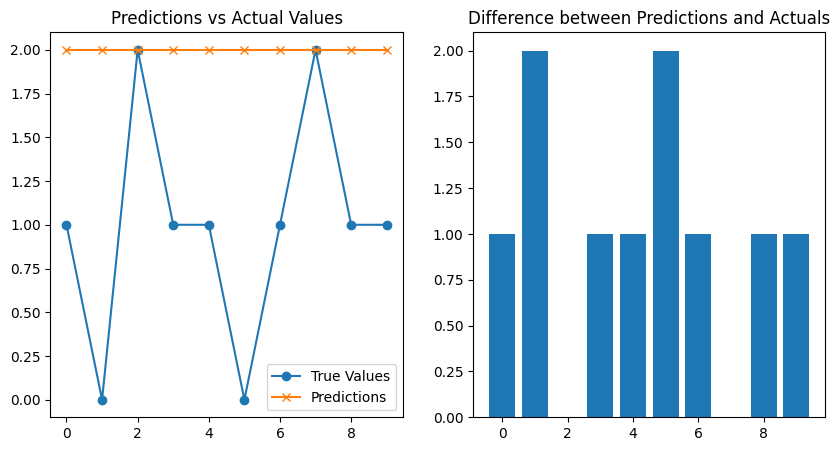

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize predictions vs actual values
y_pred_class = np.argmax(y_pred, axis=1)  # Convert one-hot encoded predictions to class labels
y_test_class = np.argmax(y_test_onehot, axis=1)  # Convert one-hot encoded true values to class labels

plt.figure(figsize=(10, 5))

# Plot the first 10 predictions vs true values
plt.subplot(1, 2, 1)
plt.plot(y_test_class[:10], label='True Values', marker='o')
plt.plot(y_pred_class[:10], label='Predictions', marker='x')
plt.title('Predictions vs Actual Values')
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(range(10), np.abs(y_test_class[:10] - y_pred_class[:10]))  # Difference between true and predicted values
plt.title('Difference between Predictions and Actuals')

plt.show()


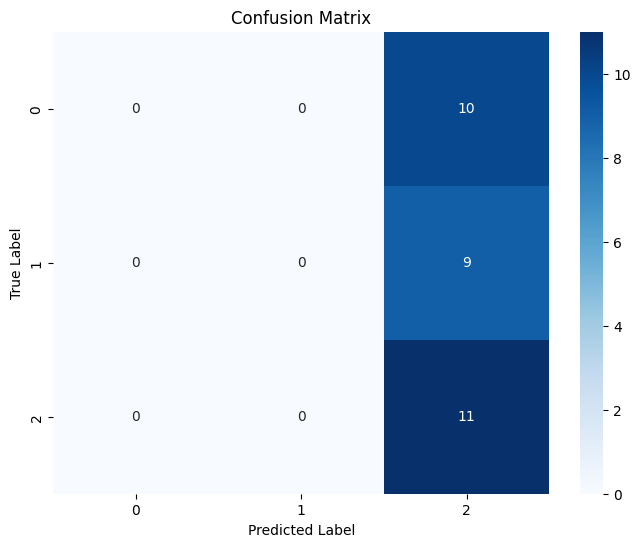

In [76]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_class), yticklabels=np.unique(y_test_class))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [78]:
# Print the model summary to view the architecture
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,835 (1.17 MB)

 Trainable params: 305,835 (1.17 MB)

 Non-trainable params: 0 (0.00 B)